<a href="https://colab.research.google.com/github/Noob919/Internship/blob/main/Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [223]:
path = "/content/Iris.csv"

In [224]:
df =  pd.read_csv(path)

In [225]:
df.head(2)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa


In [226]:
df = df.drop(columns= ['Id'])

In [227]:
df.head(2)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa


In [228]:
df_iris = df.replace(to_replace= {'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2})

In [229]:
df_iris.head(2)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0


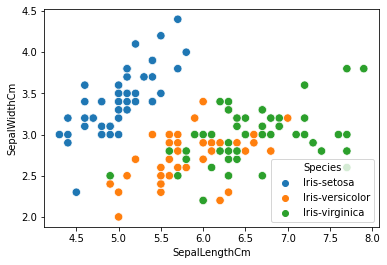

In [230]:
sns.scatterplot(x = df_iris['SepalLengthCm'], y = df_iris['SepalWidthCm'],s =70, hue = df['Species'])

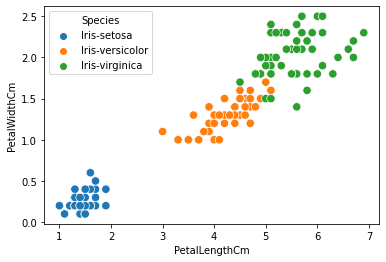

In [231]:
sns.scatterplot(x = df_iris['PetalLengthCm'], y = df_iris['PetalWidthCm'], s = 70,hue = df['Species'])

In [232]:
from sklearn.cluster import KMeans

In [233]:
Kmeans = KMeans(n_clusters = 3)

In [234]:
y_predict = Kmeans.fit_predict(df_iris.iloc[:,:-1])

In [235]:
y_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int32)

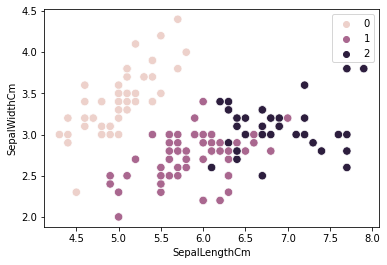

In [236]:
sns.scatterplot(x = df['SepalLengthCm'], y = df['SepalWidthCm'],s = 70, hue = y_predict)

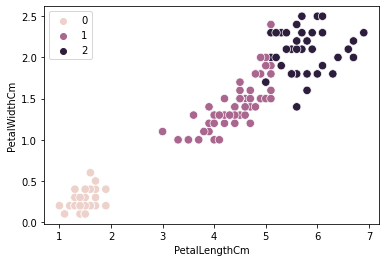

In [237]:
sns.scatterplot(x = df['PetalLengthCm'], y = df['PetalWidthCm'], s=70, hue = y_predict)

In [245]:
from sklearn.metrics import r2_score,mean_squared_error,accuracy_score

In [246]:
print(r2_score(df_iris.iloc[:,4:],y_predict))
print(mean_squared_error(df_iris.iloc[:,4:],y_predict))
print(accuracy_score(df_iris.iloc[:,4:],y_predict))

0.84
0.10666666666666667
0.8933333333333333


In [248]:
MSS = []
for i in range(1,12):
  k_clusters = KMeans(n_clusters = i)
  k_clusters.fit(df_iris.iloc[:,:-1])
  MSS.append(k_clusters.inertia_)

Text(0.5, 1.0, 'The Elbow Method')

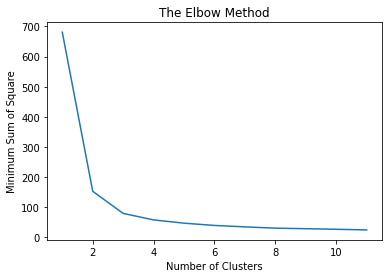

In [250]:
plt.plot(range(1,12),MSS)
plt.xlabel('Number of Clusters')
plt.ylabel('Minimum Sum of Square')
plt.title('The Elbow Method')